# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os 
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/stickybeak/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
/Users/stickybeak/anaconda3/envs/pyv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()

True

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_all = newsapi.get_everything(
    q="bitcoin",
    from_param="2021-05-07",
    to="2021-05-09",
)
btc_all['articles'][:2]

[{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
  'author': 'Alex Wilhelm',
  'title': 'What Square’s smashing earnings tell us about consumer bitcoin demand',
  'description': "Today we're talking Square earnings and its bitcoin base, especially in how it relates to the results of other entities that offer bitcoin sales.",
  'url': 'http://techcrunch.com/2021/05/07/what-squares-smashing-earnings-tell-us-about-consumer-bitcoin-demand/',
  'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/05/NSussman_Techcrunch_Exchange_v3-ORNG.jpg?w=533',
  'publishedAt': '2021-05-07T18:17:36Z',
  'content': 'Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]'},
 {'source': {'id': 'reuters', 'name': 'Reuters'},
  'author': 'Reuters',
  'title': 'Goldman launches cryptocurrency trading team -memo - Reuters',
  'description

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_all = newsapi.get_everything(
    q="ethereum",
    from_param="2021-05-07",
    to="2021-05-09",
)
eth_all['articles'][:2]

[{'source': {'id': 'mashable', 'name': 'Mashable'},
  'author': 'Stan Schroeder',
  'title': 'Crypto startup Dfinity takes on Ethereum with launch of Internet Computer',
  'description': 'It took a while to get here, but Dfinity is finally launching.\xa0\nIn July 2018, I went to the Swiss city of Zug to speak to Dominic Williams, CEO of crypto platform Dfinity. Its blockchain project has impossibly bold branding — they call it "Internet Computer" …',
  'url': 'https://mashable.com/article/dfinity-internet-computer/',
  'urlToImage': 'https://mondrian.mashable.com/2021%252F05%252F07%252Fba%252F0e74f059e3b341488ef62af9ba1a21d3.e9a5c.jpg%252F1200x630.jpg?signature=NqVW0ZW54W31gecv8jLt8f_Y9uE=',
  'publishedAt': '2021-05-07T14:00:00Z',
  'content': 'It took a while to get here, but Dfinity is finally launching.\xa0\r\nIn July 2018, I went to the Swiss city of Zug to speak to Dominic Williams, CEO of crypto platform Dfinity. Its blockchain project has… [+4319 chars]'},
 {'source': {'id': 'r

### ETHEREUM SCORES

In [6]:
from pandas.io.json import json_normalize
df_eth = json_normalize(eth_all['articles'])
#select the title and content columns and return them into a df
df_eth = df_eth[['title', 'content']]

In [7]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
# loop through the content column and apply the analyzer to each, returning a new 'scores' column
scores = []
for i in range (0, len(df_eth['content'])):
    scores.append(analyzer.polarity_scores(df_eth['content'][i])
    )
df_eth['scores'] = scores
df_eth.head()



,title,content,scores
0,Crypto startup Dfinity takes on Ethereum with ...,"It took a while to get here, but Dfinity is fi...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,ANALYSIS-Cryptocurrency ethereum is flourishin...,"NEW YORK, May 7 (Reuters) - Ethereum has outpe...","{'neg': 0.0, 'neu': 0.954, 'pos': 0.046, 'comp..."
2,Analysis: Cryptocurrency ethereum is flourishi...,Ethereum has outperformed major digital curren...,"{'neg': 0.0, 'neu': 0.962, 'pos': 0.038, 'comp..."
3,A conversation with Bison Trails: the AWS-like...,Coinbase shares tumbled today to their their l...,"{'neg': 0.047, 'neu': 0.831, 'pos': 0.122, 'co..."
4,Bitcoin vs. Ethereum: 10 experts told us which...,Bitcoin vs. Ethereum\r\nGetty Images AsiaPac\r...,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp..."


In [8]:
df_eth_scores = pd.DataFrame.from_records(df_eth['scores'])
df_eth_scores.head()

,compound,neg,neu,pos
0,0.0000,0.000,1.000,0.000
1,0.1027,0.000,0.954,0.046
2,0.0516,0.000,0.962,0.038
3,0.4404,0.047,0.831,0.122
4,0.6423,0.000,0.851,0.149


In [9]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
df_btc = pd.DataFrame(btc_all['articles'])
df_btc = df_btc[['title','content']]

scores = []
for i in range (0, len(df_btc['content'])):
    scores.append(analyzer.polarity_scores(df_btc['content'][i])
    )
df_btc['scores'] = scores
df_btc.head()


,title,content,scores
0,What Square’s smashing earnings tell us about ...,Shares of Square are up more than 6% today aft...,"{'neg': 0.0, 'neu': 0.942, 'pos': 0.058, 'comp..."
1,Goldman launches cryptocurrency trading team -...,Goldman Sachs Group Inc (GS.N) on Friday revea...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,Bitcoin vs. Ethereum: 10 experts told us which...,Bitcoin vs. Ethereum\r\nGetty Images AsiaPac\r...,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp..."
3,Citi weighs launching cryptocurrency services ...,By Reuters Staff\r\nMay 7 (Reuters) - Citigrou...,"{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound..."
4,Fundstrat's head of digital assets research wa...,"Back in 2015, David Grider was working at an i...","{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp..."


In [10]:
btc_scores_df = pd.DataFrame.from_records(df_btc['scores'])
btc_scores_df.head()

,compound,neg,neu,pos
0,0.2960,0.0,0.942,0.058
1,0.0000,0.0,1.000,0.000
2,0.6423,0.0,0.851,0.149
3,0.4588,0.0,0.900,0.100
4,0.4767,0.0,0.909,0.091


In [11]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_scores_df.describe()

,compound,neg,neu,pos
count,20.000000,20.000000,20.000000,20.000000
mean,0.126185,0.023350,0.925600,0.051050
std,0.389123,0.047002,0.052678,0.049717
min,-0.743000,0.000000,0.826000,0.000000
25%,0.000000,0.000000,0.905250,0.000000
50%,0.199350,0.000000,0.926500,0.052000
75%,0.445000,0.011750,0.956000,0.082000
max,0.642300,0.174000,1.000000,0.149000


In [12]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
df_eth_scores.describe()

,compound,neg,neu,pos
count,20.000000,20.000000,20.000000,20.000000
mean,0.181795,0.020700,0.917800,0.061500
std,0.392201,0.054105,0.078522,0.072903
min,-0.822500,0.000000,0.708000,0.000000
25%,0.000000,0.000000,0.901000,0.000000
50%,0.231950,0.000000,0.929000,0.058000
75%,0.445000,0.000000,0.971500,0.082000
max,0.894100,0.229000,1.000000,0.292000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum (with a mean positive score of .061)

Q: Which coin had the highest compound score?

A: Ethereum with a compund score maximum of 0.89, indicating a more positive sentiment than the maximum compound score for btc (0.64)

Q. Which coin had the highest positive score?

A: Ethereum (0.29 vs BTC 0.15)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer()
# Create a list of stopwords
sw = stopwords.words('english')
# Expand the default stopwords list if necessary
sw.append("char")

In [15]:
df_btc['content'][0]

'Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]'

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [wnl.lemmatize(word) for word in words]

    # Convert the words to lowercase
    lowers = [word.lower() for word in lem] 
    
    # Remove the stop words
    tokens = [word for word in lowers if word not in sw]
    
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_tokens = []
for i in range(len(df_btc['content'])):
    btc_tokens.append(tokenizer(df_btc['content'][i]))
df_btc['token_list'] = btc_tokens
df_btc.head()



,title,content,scores,token_list
0,What Square’s smashing earnings tell us about ...,Shares of Square are up more than 6% today aft...,"{'neg': 0.0, 'neu': 0.942, 'pos': 0.058, 'comp...","[shares, square, today, american, fintech, com..."
1,Goldman launches cryptocurrency trading team -...,Goldman Sachs Group Inc (GS.N) on Friday revea...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","[goldman, sachs, group, inc, gsn, friday, reve..."
2,Bitcoin vs. Ethereum: 10 experts told us which...,Bitcoin vs. Ethereum\r\nGetty Images AsiaPac\r...,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...","[bitcoin, v, ethereumgetty, images, asiapacbit..."
3,Citi weighs launching cryptocurrency services ...,By Reuters Staff\r\nMay 7 (Reuters) - Citigrou...,"{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound...","[reuters, staffmay, reuters, citigroup, inc, w..."
4,Fundstrat's head of digital assets research wa...,"Back in 2015, David Grider was working at an i...","{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...","[back, david, grider, wa, working, investment,..."


In [18]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

eth_tokens = []
for i in range(len(df_eth['content'])):
    eth_tokens.append(tokenizer(df_eth['content'][i]))
df_eth['token_list'] = eth_tokens
df_eth.head()

,title,content,scores,token_list
0,Crypto startup Dfinity takes on Ethereum with ...,"It took a while to get here, but Dfinity is fi...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","[took, get, dfinity, finally, launchingin, jul..."
1,ANALYSIS-Cryptocurrency ethereum is flourishin...,"NEW YORK, May 7 (Reuters) - Ethereum has outpe...","{'neg': 0.0, 'neu': 0.954, 'pos': 0.046, 'comp...","[new, york, may, reuters, ethereum, ha, outper..."
2,Analysis: Cryptocurrency ethereum is flourishi...,Ethereum has outperformed major digital curren...,"{'neg': 0.0, 'neu': 0.962, 'pos': 0.038, 'comp...","[ethereum, ha, outperformed, major, digital, c..."
3,A conversation with Bison Trails: the AWS-like...,Coinbase shares tumbled today to their their l...,"{'neg': 0.047, 'neu': 0.831, 'pos': 0.122, 'co...","[coinbase, share, tumbled, today, lowest, poin..."
4,Bitcoin vs. Ethereum: 10 experts told us which...,Bitcoin vs. Ethereum\r\nGetty Images AsiaPac\r...,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...","[bitcoin, v, ethereumgetty, images, asiapacbit..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
ngrams(df_btc["token_list"], n=2)

<generator object ngrams at 0x7fa1de3a4850>

In [21]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_ngrams = []
for i in range(len(df_btc["token_list"])): 
    btc_ngrams.append(list(ngrams(df_btc["token_list"][i], n=2)))

In [22]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_ngrams = []
for i in range(len(df_eth["token_list"])): 
    eth_ngrams.append(list(ngrams(df_eth["token_list"][i], n=2)))

In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
token_mash_btc = []
for token in df_btc['token_list']:
    for word in token:
        token_mash_btc.append(word)

In [25]:
token_count(token_mash_btc, N=10)

[('reuters', 8),
 ('cryptocurrency', 6),
 ('bitcoin', 5),
 ('investor', 5),
 ('elon', 5),
 ('ahead', 4),
 ('ha', 4),
 ('saturday', 4),
 ('year', 4),
 ('dogecoin', 4)]

In [26]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_mash_eth = []
for token in df_eth['token_list']:
    for word in token:
        token_mash_eth.append(word)
        
token_count(token_mash_eth, N=10)

[('ha', 7),
 ('elon', 6),
 ('new', 4),
 ('reuters', 4),
 ('year', 4),
 ('market', 4),
 ('cryptocurrency', 4),
 ('investor', 4),
 ('musk', 4),
 ('saturday', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

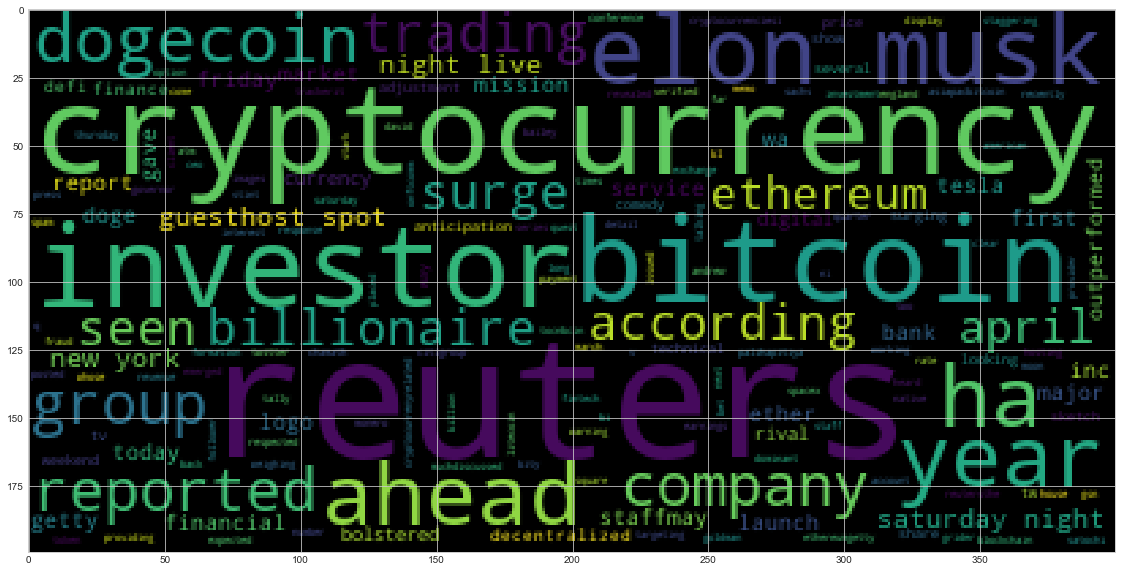

In [28]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_string = " ".join(token_mash_btc)
wc = WordCloud().generate(btc_string)
plt.imshow(wc)

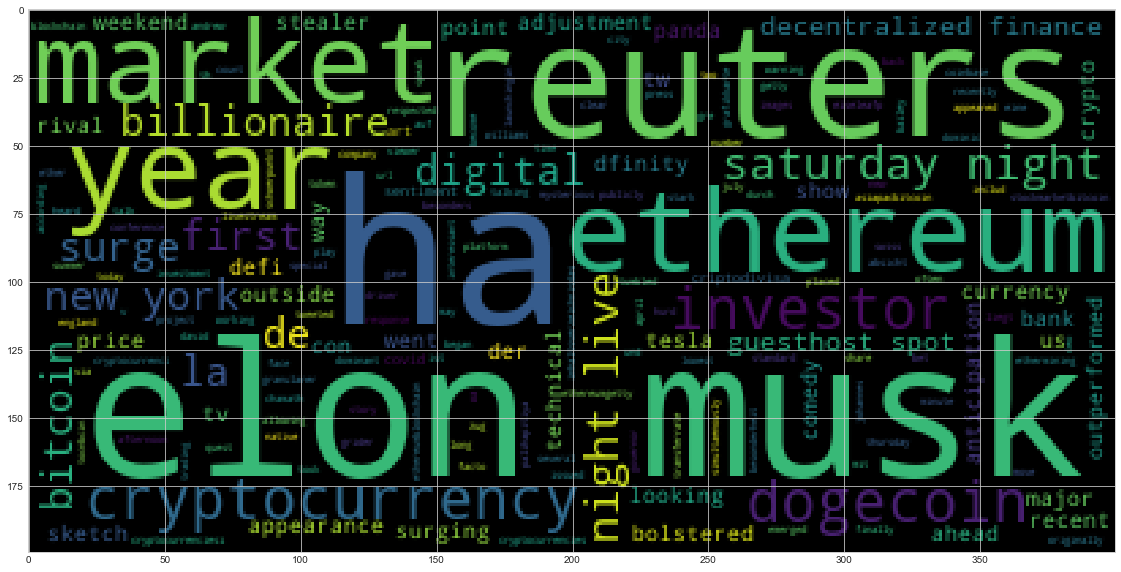

In [29]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_string = " ".join(token_mash_eth)
wc = WordCloud().generate(eth_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [30]:
import spacy
from spacy import displacy

In [31]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [54]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_text = str([x for x in df_btc.content])

In [58]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(btc_text)
# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Welcome to a BTC text analysis"


In [63]:
# Render the visualization
# YOUR CODE HERE!
colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}
displacy.render(doc, style='ent', options=options)


In [69]:
# List all Entities
# YOUR CODE HERE!
doc.ents

(more than 6%,
 today,
 American,
 $5.06 billion,
 2021,
 3.36,
 Goldman Sachs Group Inc,
 Friday,
 Reuters.\r\nThe,
 Reuters,
 March,
 Bitcoin,
 Ethereum,
 number two,
 2021,
 Reuters,
 Staff\r\nMay 7,
 Reuters,
 the Financial Times,
 2015,
 David Grider,
 first,
 ATM,
 House,
 Satochi,
 Twitter,
 Elon Musk,
 Saturday Ni,
 Thursday,
 Bank of England,
 Andrew Bailey,
 Reuters,
 Staff\r\nMay 9,
 Reuters,
 the first quarter of next year,
 Elon Musks,
 Dogecoin,
 April 20, 2021,
 Dado Ruvic,
 early U.S. hours,
 Sunday,
 Tesla,
 Elon Musk,
 10,
 Things Before the Opening Bell,
 weekly,
 NEW YORK,
 May 7,
 Reuters,
 this year,
 this year,
 this summer,
 the past several years,
 China,
 NEW YORK,
 Reuters,
 this weekends,
 NEW YORK,
 Reuters,
 this weekends,
 Xinhua/Wang Ying/ Getty,
 500,
 Friday,
 a weak April,
 the Federal Reserve,
 today,
 April 14)

---

### Ethereum NER

In [70]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_text = str([x for x in df_eth.content])

In [72]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc2 = nlp(eth_text)
# Add a title to the document
# YOUR CODE HERE!
doc2.user_data["title"] = "An ethereum ENT display"

In [73]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc2, style='ent', options=options)

In [74]:
# List all Entities
# YOUR CODE HERE!
doc2.ents

(Dfinity,
 July 2018,
 Swiss,
 Dominic Williams,
 NEW YORK,
 May 7,
 Reuters,
 this year,
 this year,
 this summer,
 today,
 April 14,
 Bitcoin,
 Ethereum,
 number two,
 2021,
 recent years,
 2015,
 David Grider,
 first,
 Thursday,
 Bank of England,
 Andrew Bailey,
 Besonderheit,
 Ethereum-Blockchain,
 Der Schwerpunkt,
 Größe des Grafikkarte,
 Elon Musk,
 U.S.,
 90-minute,
 Saturday Night Live for the first time in,
 more than 100,
 10,
 Things Before the Opening Bell,
 weekly,
 early U.S. hours,
 Sunday,
 Tesla,
 Elon Musk,
 NEW YORK,
 Reuters,
 this weekends,
 NEW YORK,
 Reuters,
 this weekends,
 Elon Musk,
 Reddit,
 SNL,
 Panda Stealer,
 Panda Stealer,
 Bytecoin, Litecoin,
 Ethereum,
 First,
 Tesla,
 de Elon Musk la,
 GREAT,
 weeks,
 COVID-19,
 European,
 Tuesday,
 German,
 ZEW,
 Reuters,
 Frankfurt,
 Germany,
 a year)

---